## step:1 Business Problem
**Business Problem:** This dataset provides a comprehensive overview of various factors affecting student performance in exams. It includes information on study habits, attendance, parental involvement, and other aspects influencing academic success.

**Problem Statement:** Using the provided dataset (StudentPerformanceFactors.csv), your task is to analyze the key factors that influence student performance and develop a predictive model to identify students who are at risk of underperforming. Your findings will help the school district take proactive measures to improve student success.

## step:2 Data Understanding
**Collect and Load the Data**


In [2]:
import pandas as pd
df=pd.read_csv("StudentPerformanceFactors.csv")
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


## step 3: Data Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
''' the method df.info() provides a concise summary of a DataFrame.
df.info() :at a time we understand shape,column,dtypes


In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6602    False
6603    False
6604    False
6605    False
6606    False
Length: 6607, dtype: bool

#df.duplicated() is a method used to identify duplicate rows in a DataFrame

In [7]:
df.duplicated().sum()

0

#df.duplicated().sum() it calculate total no of duplicates available or not in  the given data

In [ ]:
df.isnull() #it check the missing values in records

In [9]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

#df.isnull().sum() we are  checking total missing vaues are avialble in dataframe or not
#in this data set three missing values are there that missing values we need to clean the data Data preprocessing step.
#Data preprocessing step if in case i want to clean data that time i want to clean the data  otherwise i don't need to clean data.

In [3]:
continuous=['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Exam_Score']
discrete_categorical=['Parental_Involvement','Access_to_Resources','Extracurricular_Activities','Motivation_Level','Internet_Access','Family_Income','Teacher_Quality','School_Type','Peer_Influence','Learning_Disabilities','Parental_Education_Level','Distance_from_Home','Gender']
discrete_count=['Tutoring_Sessions','Physical_Activity']

In [10]:
df[continuous]

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Exam_Score
0,23,84,7,73,67
1,19,64,8,59,61
2,24,98,7,91,74
3,29,89,8,98,71
4,19,92,6,65,70
...,...,...,...,...,...
6602,25,69,7,76,68
6603,23,76,8,81,69
6604,20,90,6,65,68
6605,10,86,6,91,68


#when you use df[continuous], it typically means you're selecting columns that contain continuous data (usually numeric data).

df[discrete_categorical]

#df[discrete_categorical], it typically means selecting columns from a pandas DataFrame that contain discrete categorical data.
##Discrete refers to values that are distinct and countable

In [15]:
df[discrete_count]

,Tutoring_Sessions,Physical_Activity
0,0,3
1,2,4
2,2,4
3,1,4
4,3,4
...,...,...
6602,1,2
6603,3,2
6604,3,2
6605,2,3


In [ ]:
#df[discrete_count] it  means selecting columns from a pandas DataFrame that contain discrete categorical data.
#Discrete means that the data consists of distinct, countable values. 


In [17]:
df[continuous].describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,67.235659
std,5.990594,11.547475,1.46812,14.399784,3.890456
min,1.000000,60.000000,4.00000,50.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,101.000000


In [ ]:
#when you use df[continuous].describe(), it provides a summary statistics of the continuous numerical columns in a DataFrame.
describe() it gives count,mean,std,min,q1,q2,q3,max,values.by using describe,it gives a quick overview of continuous data
describe():this method generates descriptive statistics for the selected columns

In [18]:
df[discrete_categorical].describe()

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
count,6607,6607,6607,6607,6607,6607,6529,6607,6607,6607,6517,6540,6607
unique,3,3,2,3,2,3,3,2,3,2,3,3,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
freq,3362,3319,3938,3351,6108,2672,3925,4598,2638,5912,3223,3884,3814


In [ ]:
#df[discrete_categorical].describe(), it generates summary statistics for columns containing discrete categorical data
When applied to categorical data .describe() provides  summary of the statistics like count,unique,top,frequency.

,Tutoring_Sessions,Physical_Activity
count,6607.000000,6607.000000
mean,1.493719,2.967610
std,1.230570,1.031231
min,0.000000,0.000000
25%,1.000000,2.000000
50%,1.000000,3.000000
75%,2.000000,4.000000
max,8.000000,6.000000


In [11]:
df[continuous].skew()

Hours_Studied      0.013499
Attendance         0.013666
Sleep_Hours       -0.023805
Previous_Scores   -0.003737
Exam_Score         1.644808
dtype: float64

In [ ]:
#df[continuous].skew() calculates the skewness of the columns in a DataFrame indexed by continuous
'''Skewness is a measure of the asymmetry of a distribution.
It helps understand how much the data deviates from a normal distribution

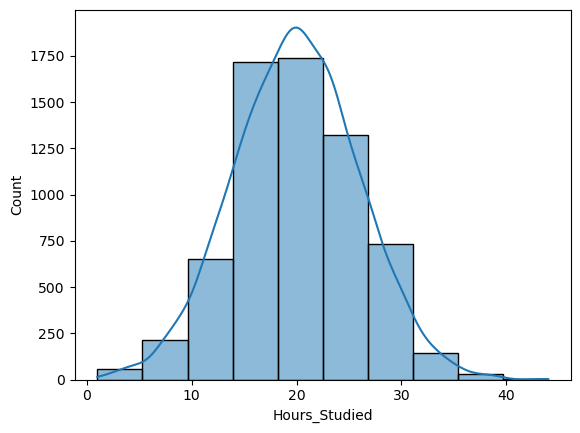

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df['Hours_Studied'],bins=10,kde=True)
plt.show()

In [ ]:
A histplot is a type of plot used in data visualization to display the distribution of a dataset
by above histplot tells that in which data points are distbuted across more

## step:3 Data Preprocessing
** Data Cleaning**

In [64]:
df[['Teacher_Quality','Parental_Education_Level','Distance_from_Home']].isnull().sum()

Teacher_Quality             78
Parental_Education_Level    90
Distance_from_Home          67
dtype: int64

In [66]:

df['Teacher_Quality']=df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0])
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


#By Using missing values it fills missing values (NaN) in the Teacher_Quality column of a pandas DataFrame with the most frequently occurring value (mode) from the same column

In [67]:
df['Teacher_Quality'].isnull().sum()

0

In [ ]:
.isnull(): This checks each value in the column to see if it is missing
# If it is True It gives Nan value(0) otherwise it gives (not nan).

In [70]:
df['Parental_Education_Level']=df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0])
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


#By Using missing values it fills missing values (NaN) in the Parental_Education_Level column of a pandas DataFrame with the most frequently occurring value (mode) from the same column

In [71]:
df['Parental_Education_Level'].isnull().sum()

0

In [72]:
df['Distance_from_Home']=df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0])
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


#By Using missing values it fills missing values (NaN) in the Distance_from_Home column of a pandas DataFrame with the most frequently occurring value (mode) from the same column

In [73]:
df['Distance_from_Home'].isnull().sum()

0

In [ ]:
.isnull(): This checks each value in the column to see if it is missing
# If it is True It gives Nan value(0) otherwise it gives (not nan).

## Step 4:Analysis 

In [ ]:
1.How do study habits (Hours_Studied, Sleep_Hours, Tutoring_Sessions) correlate with Exam_Score

                   Hours_Studied  Sleep_Hours  Tutoring_Sessions  \
Hours_Studied           1.000000     0.010977          -0.014282   
Sleep_Hours             0.010977     1.000000          -0.012216   
Tutoring_Sessions      -0.014282    -0.012216           1.000000   
Previous_Scores         0.024846    -0.021750          -0.013122   
Exam_Score              0.445455    -0.017022           0.156525   

                   Previous_Scores  Exam_Score  
Hours_Studied             0.024846    0.445455  
Sleep_Hours              -0.021750   -0.017022  
Tutoring_Sessions        -0.013122    0.156525  
Previous_Scores           1.000000    0.175079  
Exam_Score                0.175079    1.000000  


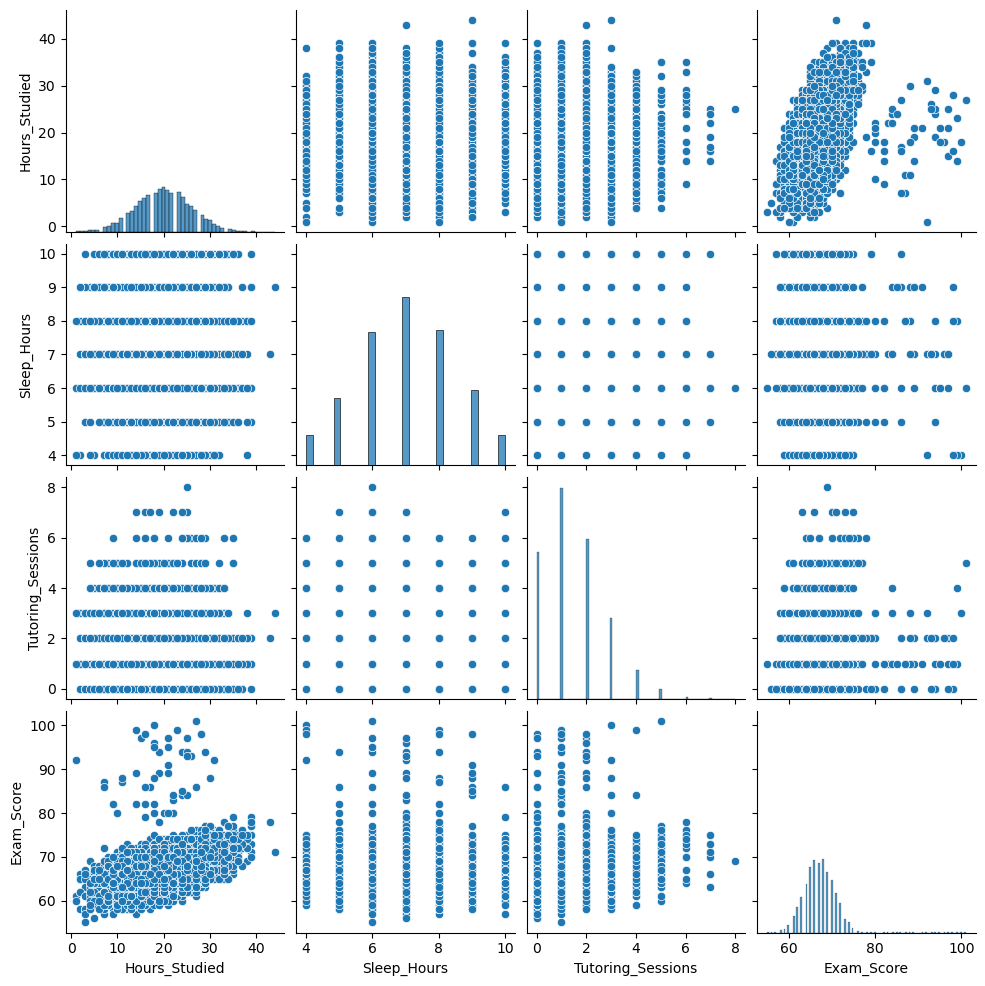

In [14]:
sns.pairplot(df, vars=['Hours_Studied', 'Sleep_Hours', 'Tutoring_Sessions', 'Exam_Score'])

# Calculate correlation matrix
correlation_matrix = df[['Hours_Studied', 'Sleep_Hours', 'Tutoring_Sessions','Previous_Scores', 'Exam_Score']].corr()
print(correlation_matrix)


In [ ]:
the corr() function is used to calculate the correlation between two or more independent variables.
Correlation is a statistical measure that shows how strongly two variables are related to each other
# here above  plots shows a perfect positive correlation (correlation coefficient = 1) between the two variables, indicating that as one variable increases, the other increases proportionally.
r>0.8 :above data >0.8 we consider as strong correlation
0.5<=|r|>=0.8 it is moderate correlation
|r|<0.5 it is weak correlation
|r|=0 there is no correlation

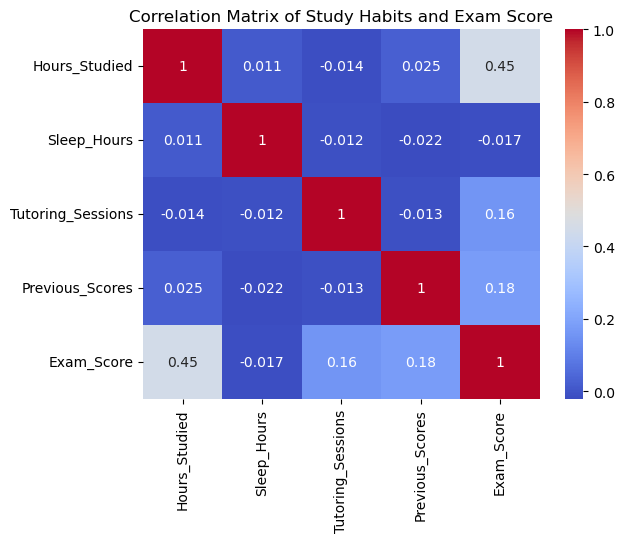

In [13]:
# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Study Habits and Exam Score')
plt.show()

In [ ]:
#sns.pairplot(): Creates a grid of scatter plots for pairwise relationships among specified variables, with diagonal plots showing univariate distributions.
#This visualization helps in identifying correlations and distributions
#sns.heatmap(): Visualizes the correlation matrix with color gradients; annot=True displays correlation coefficients on the heatmap, and cmap='coolwarm' sets the color scheme.
'''The pairplot and correlation matrix reveal how Hours_Studied, Sleep_Hours, and Tutoring_Sessions relate to Exam_Score. 
Positive correlations suggest that increased study hours and tutoring sessions are associated with higher exam scores
The heatmap reveals that Attendance and Hours_Studied are the most important factors positively correlated with Exam_Score. Other variables such as Tutoring_Sessions, Previous_Scores, and Physical_Activity have weaker but positive correlations. Sleep duration (Sleep_Hours) seems to have no meaningful impact on exam scores in this context.

2)What is the impact of Attendance on Exam_Score?

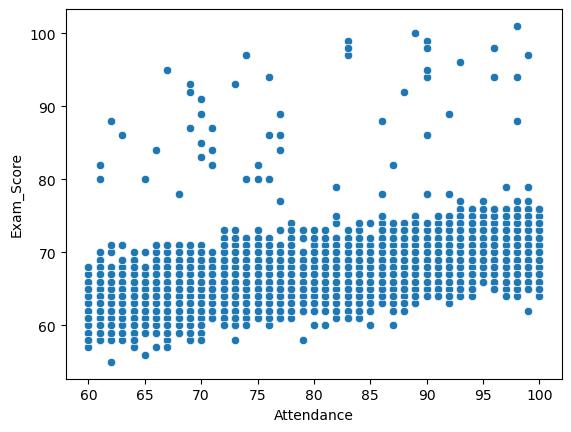

In [16]:


sns.scatterplot(x='Attendance', y='Exam_Score', data=df)

plt.show()


#sns.scatterplot(): Plots individual data points to assess the relationship between attendance and exam scores.
#Above plot i am observing that attendence is more that time students perform well in their exams.Attendence is low students got less score in their exams

In [4]:
mean_scores_parental = df.groupby('Parental_Involvement')['Exam_Score'].mean()
print(mean_scores_parental)

Parental_Involvement
High      68.092767
Low       66.358265
Medium    67.098156
Name: Exam_Score, dtype: float64


In [ ]:
#df.groupby('Parental_Involvement'):This method groups the DataFrame df by the unique values in the 'Parental_Involvement' column.
#mean():it calculate the average of the exam_score
#Exam_Score:This selects the 'Exam_Score' column from the GroupBy object.

3)How does Parental_Involvement influence Exam_Score

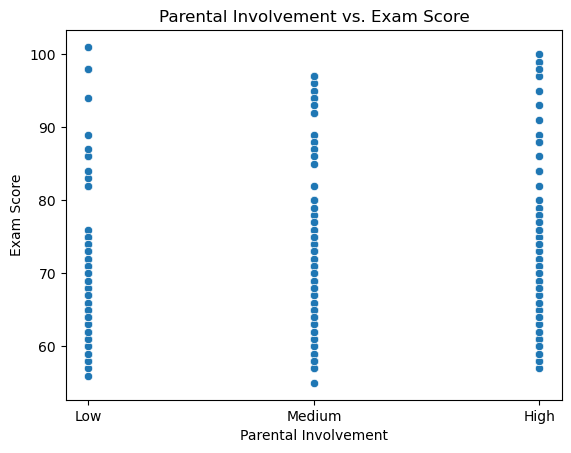

In [8]:
#plt.figure(figsize=(10, 6))
sns.scatterplot(x='Parental_Involvement', y='Exam_Score', data=df)
plt.title('Parental Involvement vs. Exam Score')
plt.xlabel('Parental Involvement')
plt.ylabel('Exam Score')
plt.show()

#sns.boxplot(): Displays the distribution of exam scores across different levels of parental involvement, highlighting medians and potential outliers.
#i want to observeing that if parental involvement is low but students perform good in exams .parents involvement is high also they perform good in exams .so,it's purly based on students behaviour without Prental involvement  also they got good score in their exams

Are there differences in Exam_Score based on Tutoring_Sessions and Gender

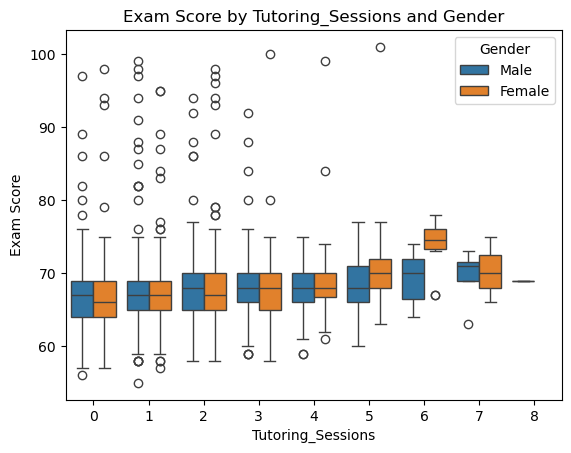

In [10]:

sns.boxplot(x='Tutoring_Sessions', y='Exam_Score', hue='Gender', data=df)
plt.title('Exam Score by Tutoring_Sessions and Gender')
plt.xlabel('Tutoring_Sessions')
plt.ylabel('Exam Score')
plt.legend(title='Gender')
plt.show()

#hue='Gender': Differentiates data within each school type by gender, allowing for comparative analysis.
#Above plot tutoring sessions periods more also they perform very low in exams.But tutoring sessions less also  they performing good in exams.
#Coming to gender both are performing in exams mostly equal

5)How do extracurricular activities influence exam scores

<Figure size 1000x600 with 0 Axes>

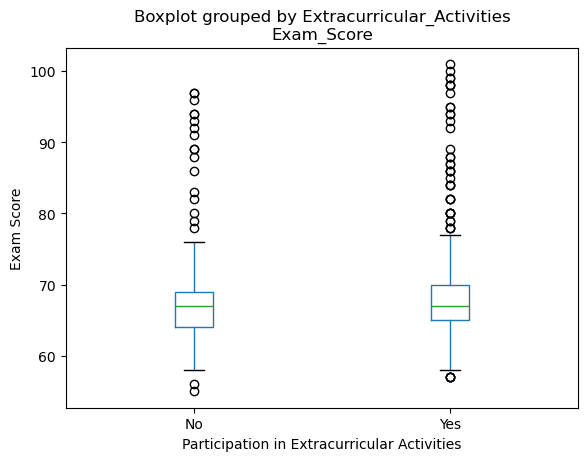

In [7]:
# Box plot of Exam Scores by Extracurricular Activities
plt.figure(figsize=(10, 6))
df.boxplot(column='Exam_Score', by='Extracurricular_Activities', grid=False)

plt.xlabel('Participation in Extracurricular Activities')
plt.ylabel('Exam Score')
plt.show()

#Students are performing more extracurricular activities  they perform well in Exams. Some Students are not participated so they are not performing good in exams
#Boxplt: It provides a visual summary of key data characteristics, such as the center, spread, and potential outliers.
#in this data we no need to remove the boxplots .These are considered usual values compared to the rest of the data.

6) Does family income level affect student exam scores

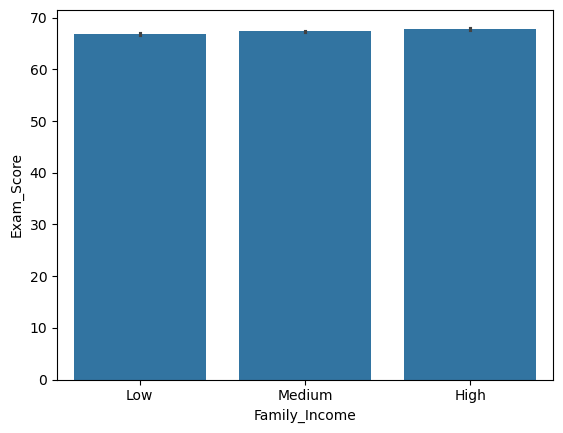

In [36]:
sns.barplot(y='Exam_Score', x='Family_Income', data=df)

plt.show()



#A bar plot (or bar chart) is a graphical representation used to display and compare the frequency, count, or other measures of categorical data or grouped data
#Above plot there is no effect on family income level by the students Exam Scores 

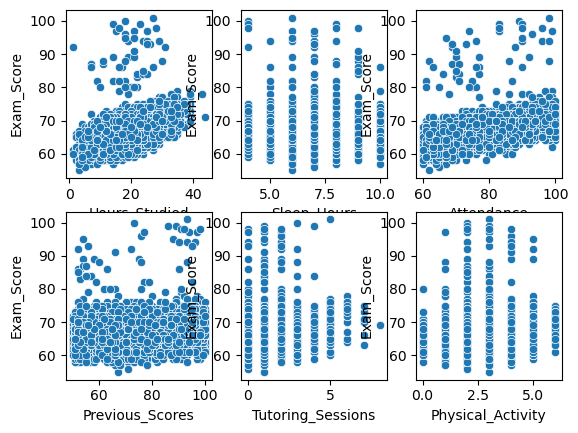

In [11]:
import seaborn as sns
#plt.figure(figsize=(10,12))
plt.subplot(2,3,1)
sns.scatterplot(x=df['Hours_Studied'],y=df['Exam_Score'],marker="o")
plt.subplot(2,3,2)
sns.scatterplot(x=df['Sleep_Hours'],y=df['Exam_Score'],marker="o")
plt.subplot(2,3,3)
sns.scatterplot(x=df['Attendance'],y=df['Exam_Score'],marker="o")
plt.subplot(2,3,4)
sns.scatterplot(x=df['Previous_Scores'],y=df['Exam_Score'],marker="o")
plt.subplot(2,3,5)
sns.scatterplot(x=df['Tutoring_Sessions'],y=df['Exam_Score'],marker="o")
plt.subplot(2,3,6)

sns.scatterplot(x=df['Physical_Activity'],y=df['Exam_Score'],marker="o")


plt.show()


## 
1)The x-axis represents the number of hours studied, and the y-axis represents the exam score

**I aim to see if students with less hours studying they perform better in exams.
2)The x-axis represents the sleep_Hours, and the y-axis represents the exam score
 I am looking that  students are less sleep_sleeping they perform better in exams.
3)I want to observe if students with higher attendance consistently score higher on exams.
4) i am observing that there will be a strong relationship between previous scores and current exam scores."
5)i am Observe if more tutoring sessions significantly improve exam performance
6)i want to observe that 2 to 4 hours they performing physical activity but they got good marks

<Axes: xlabel='Parental_Education_Level', ylabel='Exam_Score'>

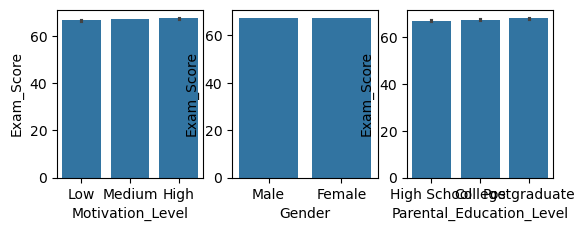

In [12]:
import seaborn as sns
#plt.figure(figsize=(10,12))
plt.subplot(2,3,1)
sns.barplot(x=df['Motivation_Level'],y=df['Exam_Score'])
plt.subplot(2,3,2)
sns.barplot(x=df['Gender'],y=df['Exam_Score'])
plt.subplot(2,3,3)
sns.barplot(x=df['Parental_Education_Level'],y=df['Exam_Score'])


1)In this bar plot i am observing that students with higher motivation tend to achieve better exam scores.
2)If no major differences are observed between genders, it suggests gender does not strongly influence exam performance.
3)Third plot i am observing thatIt is purely based on students with and without parental involement also they got good Exam_Scores.  